In [14]:
import scipy

In [13]:
import seaborn as sns

In [12]:
import sklearn

In [11]:
import statsmodels.api as sm

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r"C:\Users\nnhp\Downloads\real_estate_price_size_year.csv") #download the data file, pass the path of that file 
data

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009
...,...,...,...
95,252460.400,549.80,2009
96,310522.592,1037.44,2009
97,383635.568,1504.75,2006
98,225145.248,648.29,2015


In [7]:
data.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [8]:
y= data["price"]
x1= data["size"]

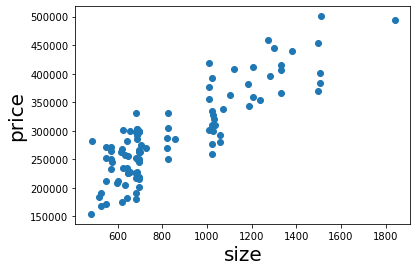

In [9]:
plt.scatter(x1,y)
plt.xlabel("size", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

In [15]:
x= sm.add_constant(x1)
model= sm.OLS(y,x)
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 21 May 2021   Prob (F-statistic):           8.13e-31
Time:                        08:05:35   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

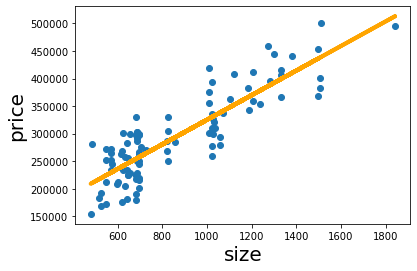

In [16]:
plt.scatter(x1,y)
yhat= 223.1787*x1 + 101900
fig= plt.plot(x1,yhat,lw=4, c= 'orange', label='regression line')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

In [37]:
new_data = pd.DataFrame({'constant' : 1, 'size':[200,237,543]})

In [38]:
new_data

,constant,size
0,1,200
1,1,237
2,1,543


In [39]:
prediction= results.predict(new_data)
prediction

0    146548.350320
1    154805.963796
2    223098.659030
dtype: float64

In [40]:
predictiondf= pd.DataFrame({'prediction': prediction})
joined = new_data.join(predictiondf)
joined.rename(index={0:'a',1:'b',2:'c'})

,constant,size,prediction
a,1,200,146548.350320
b,1,237,154805.963796
c,1,543,223098.659030
